In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

rewards: tuple[float, ...] = (-0.1, -0.1, -0.1, -0.1,
                              -0.1, -1.0, -0.1, -1.0,
                              -0.1, -0.1, -0.1, -1.0,
                              -1.0, -0.1, -0.1, 1.0)

transition_matrix: tuple[tuple[tuple[tuple[float, int]]]] = \
    ((((.9, 0), (.1, 4)), ((.1, 0), (.8, 4), (.1, 1)),
      ((.1, 4), (.8, 1), (.1, 0)), ((.1, 1), (.9, 0))),
     (((.1, 1), (.8, 0), (.1, 5)), ((.1, 0), (.8, 5), (.1, 2)),
      ((.1, 5), (.8, 2), (.1, 1)), ((.1, 2), (.8, 1), (.1, 0))),
     (((.1, 2), (.8, 1), (.1, 6)), ((.1, 1), (.8, 6), (.1, 3)),
      ((.1, 6), (.8, 3), (.1, 2)), ((.1, 3), (.8, 2), (.1, 1))),
     (((.1, 3), (.8, 2), (.1, 7)), ((.1, 2), (.8, 7), (.1, 3)),
      ((.1, 7), (.9, 3)), ((.9, 3), (.1, 2))),
     (((.1, 0), (.8, 4), (.1, 8)), ((.1, 4), (.8, 8), (.1, 5)),
      ((.1, 8), (.8, 5), (.1, 0)), ((.1, 5), (.8, 0), (.1, 4))),
     (((1.0, 5),), ((1.0, 5),), ((1.0, 5),), ((1.0, 5),)),
     (((.1, 2), (.8, 5), (.1, 10)), ((.1, 5), (.8, 10), (.1, 7)),
      ((.1, 10), (.8, 7), (.1, 2)), ((.1, 7), (.8, 2), (.1, 5))),
     (((1.0, 7),), ((1.0, 7),), ((1.0, 7),), ((1.0, 7),)),
     (((.1, 4), (.8, 8), (.1, 12)), ((.1, 8), (.8, 12), (.1, 9)),
      ((.1, 12), (.8, 9), (.1, 4)), ((.1, 9), (.8, 4), (.1, 8))),
     (((.1, 5), (.8, 8), (.1, 13)), ((.1, 8), (.8, 13), (.1, 10)),
      ((.1, 13), (.8, 10), (.1, 5)), ((.1, 10), (.8, 5), (.1, 8))),
     (((.1, 6), (.8, 9), (.1, 14)), ((.1, 9), (.8, 14), (.1, 11)),
      ((.1, 14), (.8, 11), (.1, 6)), ((.1, 11), (.8, 6), (.1, 9))),
     (((1.0, 11),), ((1.0, 11),), ((1.0, 11),), ((1.0, 11),)),
     (((1.0, 12),), ((1.0, 12),), ((1.0, 12),), ((1.0, 12),)),
     (((.1, 9), (.8, 12), (.1, 13)), ((.1, 12), (.8, 13), (.1, 14)),
      ((.1, 13), (.8, 14), (.1, 9)), ((.1, 14), (.8, 9), (.1, 12))),
     (((.1, 10), (.8, 13), (.1, 14)), ((.1, 13), (.8, 14), (.1, 15)),
      ((.1, 14), (.8, 15), (.1, 10)), ((.1, 15), (.8, 10), (.1, 13))),
     (((1.0, 15),), ((1.0, 15),), ((1.0, 15),), ((1.0, 15),)))


def valid_state(state: int) -> bool:
    return isinstance(state, (int, np.signedinteger)) and 0 <= state < 16


def valid_action(action: int) -> bool:
    return isinstance(action, (int, np.signedinteger)) and 0 <= action < 4


N_STATES: int = 16
N_ACTIONS: int = 4
EPSILON: float = 1e-8
GAMMA: float = 0.9
DETERMINISTIC: bool = False

HOME: int = 0 
SCHOOL: int = 15

def get_next_states(state: int, action: int) -> list[int]:
    """
    Fetches the possible next states given the state and action pair.
    :param state: a number between 0 - 15.
    :param action: an integer between 0 - 3.
    :return: A list of possible next states. Each next state is a number between 0 - 15.
    """
    assert valid_state(state), \
        f"State {state} must be an integer between 0 - 15."
    assert valid_action(action), \
        f"Action {action} must be an integer between 0 - 3."
    next_state_probs = {next_state: trans_prob for trans_prob,
                        next_state in transition_matrix[state][action]}
    if DETERMINISTIC:
        return [max(next_state_probs, key=next_state_probs.get)]
    return next_state_probs.keys()


def get_trans_prob(state: int, action: int, next_state: int) -> float:
    """
    Fetches the transition probability for the next state
    given the state and action pair.
    :param state: an integer between 0 - 15.
    :param action: an integer between 0 - 3.
    :param outcome_state: an integer between 0 - 15.
    :return: the transition probability.
    """
    assert valid_state(state), \
        f"State {state} must be an integer between 0 - 15."
    assert valid_action(action), \
        f"Action {action} must be an integer between 0 - 3."
    assert valid_state(next_state), \
        f"Next state {next_state} must be an integer between 0 - 15."
    next_state_probs = {next_state: trans_prob for trans_prob,
                        next_state in transition_matrix[state][action]}
    # If the provided next_state is invalid.
    if next_state not in next_state_probs.keys():
        return 0.
    if DETERMINISTIC:
        return float(next_state == max(next_state_probs, key=next_state_probs.get))
    return next_state_probs[next_state]


def get_reward(state: int) -> float:
    """
    Fetches the reward given the state. This reward function depends only on the current state.
    In general, the reward function can also depend on the action and the next state.
    :param state: an integer between 0 - 15.
    :return: the reward.
    """
    assert valid_state(state), \
        f"State {state} must be an integer between 0 - 15."
    return rewards[state]


def get_action_as_str(action: int) -> str:
    """
    Fetches the string representation of an action.
    :param action: an integer between 0 - 3.
    :return: the action as a string.
    """
    assert valid_action(action), \
        f"Action {action} must be an integer between 0 - 3."
    return ("left", "down", "right", "up")[action]


class mdp:
    states = np.arange(N_STATES)
    actions = np.arange(N_ACTIONS)
    rewards = rewards
    
def Qvalue(mdp:mdp, s:int, u:list):
    sum = np.zeros(N_ACTIONS) 
    for a in mdp.actions:
        for sp in get_next_states(s, a):  
            sum[a] += get_trans_prob(s, a, sp) * (get_reward(sp) + GAMMA * u[sp])
    return max(sum), mdp.actions[np.where(sum == max(sum))[0][0]]
    
def valueIteration(mdp:mdp) -> float:
    up = np.zeros(N_STATES)
    
    g=0.1
    # print(f'g:{g}; E:{EPSILON*(1-GAMMA)/GAMMA}; warunek: {g <= EPSILON*(1-GAMMA)/GAMMA}')
    while g > EPSILON*(1-GAMMA)/GAMMA:
    # for _ in range(15):
        u = up.copy()
        g = 0
        
        for s in mdp.states:
            up[s], _ = Qvalue(mdp, s, u)
            if (gg := abs(up[s] - u[s])) > g:
                g = gg
    
    return up
    


In [2]:
    
if __name__ == '__main__':
    m = mdp
    u = valueIteration(m)
    U = np.reshape(u,(4,4))
    print(U)
  
    
   


[[ 1.37106563  0.63977694  1.73046261  0.29337703]
 [ 1.79179139 -9.99999999  2.42566494 -9.99999999]
 [ 3.77851412  6.53785125  6.25786797 -9.99999999]
 [-9.99999999  7.96469008  9.38814078  9.99999999]]


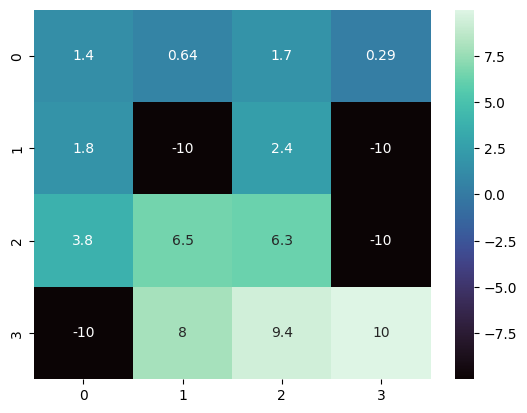

In [3]:
sns.heatmap(U,  cmap=sns.color_palette('mako', as_cmap=True), annot = True)

plt.show()

In [6]:
import random


def define_greedy_path(mdp:mdp, u):
    '''This function created the creedy path from each point based on the utility function u'''
    
    s = HOME
    states = np.zeros(N_STATES)
    actions = np.zeros(N_STATES)
    path = {'states':states, 'actions':actions}
    
    path['states'][HOME] = 1
    
    for s in mdp.states:
        # choosing the most greedy action in each step
        max, a = Qvalue(mdp, s, u)
        
        # saving the actions
        path['actions'][s] = a
        path['states'][s] = 1
        
    
    return path

def go_to_school(mdp:mdp, u):
    '''This function runs a simulation of going to school along the greedy path based on the utility functions,
    but because of slippery ice the road might be different each time, it also includes the case where you would end up in a hole.
    This is based on the probabilities of going in other direction than we want to'''
    
    
    s = HOME
    states = np.zeros(N_STATES)
    actions = np.zeros(N_STATES)
    path = {'states':states, 'actions':actions}
    
    path['states'][HOME] = 1
    while s != SCHOOL:
        if u[s] < 0:
            print("You died!")
            path['states'][s] = 1
            break
        
        # getting the best (most greedy) action in current state
        max, a = Qvalue(mdp, s, u)
        path['actions'][s] = a
        
        nextS = list(get_next_states(s, a))
        w = []
        for x in nextS:
            w.append(get_trans_prob(s, a, x))
        
        # choosing random action based on the probabilities
        s = random.choices(nextS, weights=w, k=1)[0]
        path['states'][s] = 1
        
    return path
       

In [7]:
greedy_path = define_greedy_path(m, u)

In [8]:
real_path = go_to_school(m, u)

In [9]:
def show_path(path, col, annot):
    
    states = path['states']
    actions = path['actions']
    states = np.reshape(states, (4, 4))
    actions = np.reshape(actions, (4, 4))
    sns.heatmap(U,  cmap=sns.color_palette(col, as_cmap=True), annot = annot)

    for i in range(4):
        for j in range(4):
            if(states[i][j] != 0 and ( i != 3 or j != 3)):
                if actions[i][j] == 0:
                    plt.arrow( (j + 0.5), (i + 0.5), -.4, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')
                if actions[i][j] == 1:
                    plt.arrow( (j + 0.5), (i + 0.5), 0, .4, head_width=0.1, head_length=0.1, fc='k', ec='k')
                if actions[i][j] == 2:
                    plt.arrow( (j + 0.5), (i + 0.5), .4, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')
                if actions[i][j] == 3:
                    plt.arrow( (j + 0.5), (i + 0.5), 0, -.4, head_width=0.1, head_length=0.1, fc='k', ec='k')
    if states[3][3] == 0:
        plt.text(2, 2, 'You Died', fontsize=30, color='red',
            horizontalalignment='center', verticalalignment='center', fontname='Felix Titling')
    plt.show()

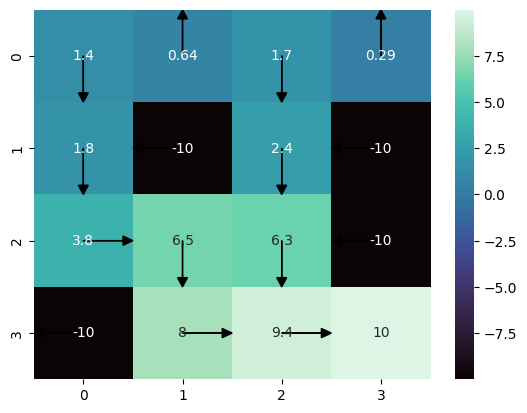

In [10]:
show_path(greedy_path, 'mako', True)

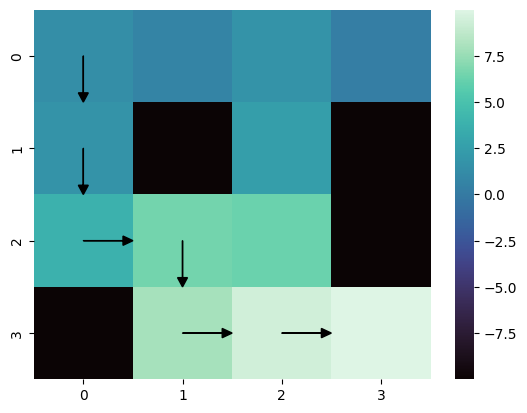

In [11]:
show_path(real_path, 'mako', False)